In [3]:
import pandas as pd


data2= pd.read_csv(r"C:/Users/rizbi/Downloads/liver_dataset.csv")

#dataset is taken from https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset
data2.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
### processing/mapping the data before working
data2=data2.dropna()
data2= pd.get_dummies(data2)
data2.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Female,gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [6]:
from sklearn.model_selection import train_test_split
X= data2.drop("is_patient", axis=1)
y= data2.is_patient
print("X shape is =", X.shape)
print("y shape is =",y.shape)

        ##scaling X since there is a large variation in data

from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

       ##### splitting train and test data  
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.25, random_state=1)

X shape is = (579, 11)
y shape is = (579,)


In [7]:
## define the algorithms to perform ML ###########

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

SEED=42

lr = LogisticRegression(random_state=SEED)


knn = KNeighborsClassifier(n_neighbors=5)


dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]


In [34]:
 #### using for loop in classifiers to measure accuracy for each model#######
 
from sklearn.metrics import accuracy_score
for name, model in classifiers:
    
    model.fit(X_train,y_train)
    
    y_predict= model.predict(X_test)
    
    accuracy= accuracy_score(y_test, y_predict)*100
    print('{:s} : {:.3f}'.format(name, accuracy) + " %")
    
    
    
    
    
    

Logistic Regression : 73.793 %
K Nearest Neighbours : 64.138 %
Classification Tree : 71.724 %


In [35]:
##### Now lets using Voting method to improve our model

from sklearn.ensemble import VotingClassifier

vc= VotingClassifier(estimators= classifiers)

vc.fit(X_train, y_train)

y_vc_predict= vc.predict(X_test)
accuracy= round(accuracy_score(y_test, y_vc_predict), 4)*100
print("Voting model accuracy= "  ,accuracy,  "%")


Voting model accuracy=  74.48 %


C:\Users\rizbi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [36]:
from sklearn.ensemble import BaggingClassifier

# using decision tree estimator

bc_tree= BaggingClassifier(base_estimator= dt, n_estimators=50, random_state=SEED )
bc_tree.fit(X_train,y_train)

y_predict_baggingTree= bc_tree.predict(X_test)


accuracy= accuracy_score(y_test, y_predict_baggingTree)*100
print("Bagging classifier model accuracy using DecisionTree= "  ,accuracy,  "%")

Bagging classifier model accuracy using DecisionTree=  73.10344827586206 %


In [41]:
            #bagging using logisticregression
    
bc_lg= BaggingClassifier(base_estimator= lr, n_estimators=50, random_state=SEED )
bc_lg.fit(X_train,y_train)

y_predict_bagging_lg= bc_lg.predict(X_test)


accuracy= accuracy_score(y_test, y_predict_bagging_lg)*100
print("Bagging classifier model accuracy using Logistic regression= "  ,accuracy,  "%")

Bagging classifier model accuracy using Logistic regression=  73.79310344827587 %


In [42]:
            #bagging using KNN

bc_knn= BaggingClassifier(base_estimator= knn, n_estimators=50, random_state=SEED )
bc_knn.fit(X_train,y_train)

y_predict_bagging_knn= bc_knn.predict(X_test)


accuracy= accuracy_score(y_test, y_predict_bagging_knn)*100
print("Bagging classifier model accuracy using KNN= "  ,accuracy,  "%")

Bagging classifier model accuracy using KNN=  64.13793103448275 %


In [91]:
from sklearn.ensemble import RandomForestClassifier
r_forest= RandomForestClassifier(n_estimators= 150, min_samples_leaf= 0.15)
r_forest.fit(X_train,y_train)

y_predict_rfc= r_forest.predict(X_test)
accuracy_rf= accuracy_score(y_test, y_predict_rfc)*100
print("Random forest accuracy = "  ,accuracy_rf,  "%")

Random forest accuracy =  72.41379310344827 %


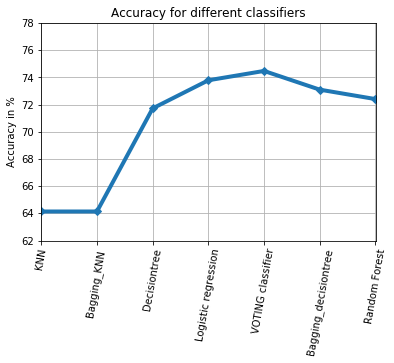

In [8]:
import matplotlib.pyplot as plt
import numpy as np
y= np.array([64.138, 64.138, 71.724,73.793,  74.48, 73.103, 72.41])
x= ["KNN","Bagging_KNN ", "Decisiontree", "Logistic regression", "VOTING classifier", "Bagging_decisiontree", "Random Forest" ]
plt.plot(x, y, '-D', linewidth=4)
plt.xticks(x, rotation= 80)
plt.margins(0.001)
plt.grid()
plt.title("Accuracy for different classifiers")
plt.ylabel("Accuracy in %")
plt.ylim(62,78)
plt.show()

# Looks like Voting classifier won the vote and KNN lost!! :)